In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


# 1 Data Preprocessing:
• Load the dataset and perform initial exploratory data analysis.
• Handle null values appropriately (e.g., using imputation or removal).
• Convert categorical variables to a suitable numerical format.
• Encode the target variable 'Segmentation' for the classification task.

In [2]:
#Loading train data into dataframe

train = pd.read_csv('train.csv')

In [3]:
#Loading test data into dataframe

test = pd.read_csv('test.csv')

In [4]:
#Printing shapes of test and train dataframes

print("Shape of train dataframe", train.shape)

print("Shape of test dataframe", test.shape)

Shape of train dataframe (8068, 11)
Shape of test dataframe (2627, 10)


In [5]:
#Printing few rows of test and train data

print('Trainig data')
print(train.head(10))

print('Testing data')
print(test.head(10))

Trainig data
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   
5  461319    Male          Yes   56        No         Artist              0.0   
6  460156    Male           No   32       Yes     Healthcare              1.0   
7  464347  Female           No   33       Yes     Healthcare              1.0   
8  465015  Female          Yes   61       Yes       Engineer              0.0   
9  465176  Female          Yes   55       Yes         Artist              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4       

In [6]:
# Display information about the train dataframe
print(train.info())

# Display information about the test dataframe
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 

In [7]:
# Display basic statistics of numerical variables in train dataframe
print(train.describe())

# Display basic statistics of numerical variables in train dataframe
print(test.describe())

                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.406763     1.531413
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000
                  ID          Age  Work_Experience  Family_Size
count    2627.000000  2627.000000      2358.000000  2514.000000
mean   463433.918919    43.649791         2.552587     2.825378
std      2618.245698    16.967015         3.341094     1.551906
min    458989.000000    18.000000         0.000000     1.000000
25%    461162.500000    30.000000         0.000000     2.000000
50%    463379.000000    41.000000       

In [8]:
# Dropping column ID from both the test and train dataframe

train.drop('ID', axis=1, inplace=True)

test.drop('ID', axis=1, inplace=True)


In [9]:
# Handle null values
# Check for missing values

train_missing_data = train.isnull().sum()

print("Missing values in training set")
print(train_missing_data)

test_missing_data = test.isnull().sum()

print("Missing values in testing set")
print(test_missing_data)

Missing values in training set
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64
Missing values in testing set
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [10]:
#Calculating the percentage of missing data for each column which has missing values in Traning dataframe

# Ever Married missing percent
EverMarried_missing_percent =(train_missing_data['Ever_Married']/len(train))*100
print('Percentage of data missing in Ever_Married column is: ', EverMarried_missing_percent)

# Graduated missing percent
Graduated_missing_percent =(train_missing_data['Graduated']/len(train))*100
print('Percentage of data missing in Graduated column is: ', Graduated_missing_percent)

# Profession missing percent
Profession_missing_percent =(train_missing_data['Profession']/len(train))*100
print('Percentage of data missing in Profession column is: ', Profession_missing_percent)

# Work_Experience missing percent

Work_Experience_missing_percent =(train_missing_data['Work_Experience']/len(train))*100
print('Percentage of data missing in Work_Experience column is: ', Work_Experience_missing_percent)

# Family_Size missing percent

Family_Size_missing_percent = (train_missing_data['Family_Size']/len(train))*100
print('Percentage of data missing in Family_Size column is: ', Family_Size_missing_percent)

# Var1 missing percent

Var_1_missing_percent = (train_missing_data['Var_1']/len(train))*100
print('Percentage of data missing in Var_1 column is: ', Var_1_missing_percent)



Percentage of data missing in Ever_Married column is:  1.7352503718393655
Percentage of data missing in Graduated column is:  0.9667823500247893
Percentage of data missing in Profession column is:  1.5369360436291521
Percentage of data missing in Work_Experience column is:  10.27516113039167
Percentage of data missing in Family_Size column is:  4.152206246901339
Percentage of data missing in Var_1 column is:  0.9419930589985127


In [11]:
#Calculating the percentage of missing data for each column which has missing values in Testing dataframe

# Ever Married missing percent
EverMarried_missing_percent =(test_missing_data['Ever_Married']/len(test))*100
print('Percentage of data missing in Ever_Married column is: ', EverMarried_missing_percent)

# Graduated missing percent
Graduated_missing_percent =(test_missing_data['Graduated']/len(test))*100
print('Percentage of data missing in Graduated column is: ', Graduated_missing_percent)

# Profession missing percent
Profession_missing_percent =(test_missing_data['Profession']/len(test))*100
print('Percentage of data missing in Profession column is: ', Profession_missing_percent)

# Work_Experience missing percent

Work_Experience_missing_percent =(test_missing_data['Work_Experience']/len(test))*100
print('Percentage of data missing in Work_Experience column is: ', Work_Experience_missing_percent)

# Family_Size missing percent

Family_Size_missing_percent = (test_missing_data['Family_Size']/len(test))*100
print('Percentage of data missing in Family_Size column is: ', Family_Size_missing_percent)

# Var1 missing percent

Var_1_missing_percent = (test_missing_data['Var_1']/len(test))*100
print('Percentage of data missing in Var_1 column is: ', Var_1_missing_percent)



Percentage of data missing in Ever_Married column is:  1.9033117624666922
Percentage of data missing in Graduated column is:  0.9135896459840122
Percentage of data missing in Profession column is:  1.446516939474686
Percentage of data missing in Work_Experience column is:  10.239817282070804
Percentage of data missing in Family_Size column is:  4.301484583174724
Percentage of data missing in Var_1 column is:  1.218119527978683


In [12]:
# Impute missing values for numerical columns Work_Experience and Family size in Train and Test dataframes

train['Work_Experience'].fillna(train['Work_Experience'].median(), inplace=True)

train['Family_Size'].fillna(train['Family_Size'].median(), inplace=True)


test['Work_Experience'].fillna(train['Work_Experience'].median(), inplace=True)

test['Family_Size'].fillna(train['Family_Size'].median(), inplace=True)


In [13]:
# Drop rows with missing values for categorical columns
train.dropna(subset=['Ever_Married', 'Graduated','Var_1','Profession'], inplace=True)

# Drop rows with missing values for categorical columns
test.dropna(subset=['Ever_Married', 'Graduated','Var_1','Profession'], inplace=True)


In [14]:
# Printing shapes of dataframes after handling missing or null values

print("Shape of train dataframe", train.shape)

print("Shape of test dataframe", test.shape)



Shape of train dataframe (7669, 10)
Shape of test dataframe (2488, 9)


In [15]:
# Convert categorical variables
# Convert categorical variables to numerical using label encoding
cat_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
for col in cat_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])

# Test dataframe

for col in cat_columns:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])



In [16]:
# Encode Target Variable
# Encode 'Segmentation' using label encoding
label_encoder = LabelEncoder()
train['Segmentation'] = label_encoder.fit_transform(train['Segmentation'])

In [17]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,5,1
8064,1,0,35,0,4,3.0,2,4.0,3,3
8065,0,0,33,1,5,1.0,2,1.0,5,3
8066,0,0,27,1,5,1.0,2,4.0,5,1


In [18]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
3,1,1,59,0,4,11.0,1,2.0,5
4,0,0,19,0,8,1.0,2,4.0,5
5,1,1,47,1,1,0.0,1,5.0,3
...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,9.0,2,4.0,5
2623,0,0,35,1,1,1.0,2,1.0,5
2624,0,0,53,1,3,1.0,2,2.0,5
2625,1,1,47,1,4,1.0,1,5.0,3


In [19]:
# Define features (X) and target variable (y)
features = train.drop(columns=['Segmentation'])  # Features
labels = train['Segmentation']  # Target variable

labels=labels.values


In [20]:
# Defining the X_test_data from the test.csv to make the prediction

X_test_data = test

print("Shape of test data from test.csv",X_test_data.shape)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_test_data = scaler.fit_transform(X_test_data)


Shape of test data from test.csv (2488, 9)


# 2. Neural Network Implementation from Scratch:
• Implement a two-layer neural network model from scratch focusing on understanding
the underlying mathematics and operations (e.g., forward propagation,
backpropagation).
• Apply the model to the preprocessed dataset.
• Investigate how the choice of activation function Sigmoid vs. ReLU affects the
performance

In [21]:
# Activation Functions

# Sigmoid

def sigmoid(t):
    return 1/(1 + np.exp(-t))

def sigmoid_prime(t):
    return sigmoid(t)*(1-sigmoid(t))

# Softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

#Relu 

def relu(t):
    return np.maximum(0.01 * t, t)

def relu_prime(t):
    return np.where(t>0, 1, 0.01)



In [22]:
# Neural Network with Sigmoid Activation

def NeuralNetwork(X, y, n_x, n_h, n_y, alpha, iterations):
    w_1 = np.random.randn(n_h, n_x)
    b_1 = np.zeros((n_h, 1))
    w_2 = np.random.randn(n_y, n_h)
    b_2 = np.zeros((n_y, 1))
    error_list = []

    for i in range(iterations):

        # Forward Propagation
        z_1 = np.dot(w_1, X) + b_1
        a_1 = sigmoid(z_1)
        z_2 = np.dot(w_2, a_1) + b_2
        a_2 = softmax(z_2)

        # Back Propagation
        dz_2 = a_2 - y
        dw_2 = np.dot(dz_2, a_1.T) / m
        db_2 = np.sum(dz_2, axis=1, keepdims=True) / m
        dz_1 = np.dot(w_2.T, dz_2) * sigmoid_prime(z_1)
        dw_1 = np.dot(dz_1, X.T) / m
        db_1 = np.sum(dz_1, axis=1, keepdims=True) / m

        w_2 -= alpha * dw_2
        b_2 -= alpha * db_2
        w_1 -= alpha * dw_1
        b_1 -= alpha * db_1
        error = -1.0 / m * np.sum(
            np.sum(y * np.log(a_2)) +
            np.sum((1 - y) * np.log(1 - a_2))
        )
        error_list.append(error)

    return w_1, b_1, w_2, b_2, error_list


In [23]:
# Neural Network with Relu Activation

def NeuralNetwork_Relu(X, y, n_x, n_h, n_y, alpha, iterations):
    w_1 = np.random.randn(n_h, n_x)
    b_1 = np.zeros((n_h, 1))
    w_2 = np.random.randn(n_y, n_h)
    b_2 = np.zeros((n_y, 1))
    error_list = []

    for i in range(iterations):

        # Forward Propagation
        z_1 = np.dot(w_1, X) + b_1
        a_1 = relu(z_1)
        z_2 = np.dot(w_2, a_1) + b_2
        a_2 = softmax(z_2)

        # Back Propagation
        dz_2 = a_2 - y
        dw_2 = np.dot(dz_2, a_1.T) / m
        db_2 = np.sum(dz_2, axis=1, keepdims=True) / m 
        dz_1 = np.dot(w_2.T, dz_2) * relu_prime(z_1)
        dw_1 = np.dot(dz_1, X.T) / m
        db_1 = np.sum(dz_1, axis=1, keepdims=True) / m

        w_2 -= alpha * dw_2
        b_2 -= alpha * db_2
        w_1 -= alpha * dw_1
        b_1 -= alpha * db_1
        error = -1.0 / m * np.sum(
            np.sum(y * np.log(a_2)) +
            np.sum((1 - y) * np.log(1 - a_2))
        )
        error_list.append(error)

    return w_1, b_1, w_2, b_2, error_list


In [24]:
# Further preprocessing data to make it fit for the defined two layer neural network model

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X = scaler.fit_transform(features)

In [25]:
# Using the One Hot Encoder on the labels
# reorienting the dimensions of the data

X = X.T
y = labels.reshape(1, len(labels)).T
enc = OneHotEncoder(categories='auto')
enc.fit(y)
y = enc.transform(y).toarray()
y = y.T

print(X.shape,labels.shape,y.shape)

(9, 7669) (7669,) (4, 7669)


In [26]:
# Defining the parameters
n_x = X.shape[0]
m = X.shape[1]

n_h = 25
n_y = 4
alpha = 0.1 #Learning rate
print(n_x, m, n_h, n_y, alpha, X.shape, y.shape)

9 7669 25 4 0.1 (9, 7669) (4, 7669)


In [27]:
import time

start_time = time.time()

w_1, b_1, w_2, b_2, error_list = NeuralNetwork(X, y, n_x, n_h, n_y, alpha, 15000)

end_time  = time.time()

execution_time_sigmoid = end_time - start_time



Execution time with Sigmoid Activation function is 685.5416119098663


Text(0, 0.5, 'Cost')

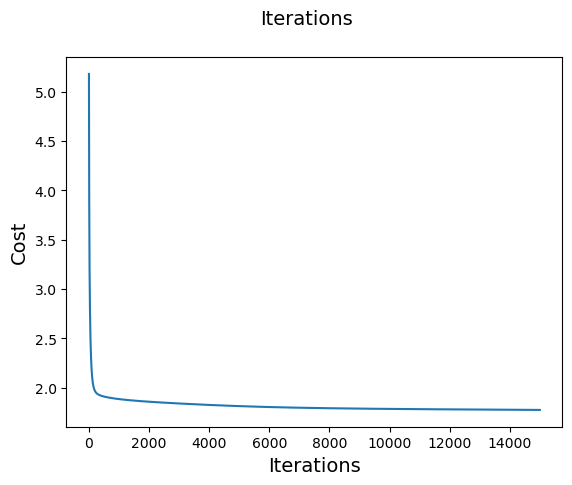

In [28]:
print("Execution time with Sigmoid Activation function is",execution_time_sigmoid)

fig = plt.figure()
plt.plot(range(len(error_list)), error_list)
fig.suptitle('Iterations', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)

In [29]:
# Making predictions

z1 = np.dot(w_1, X) + b_1
a1 = sigmoid(z1)
z2 = np.dot(w_2, a1) + b_2
a2 = softmax(z2)
pred = np.argmax(a2, axis=0)


In [30]:
# Accuracy, Confusion Matrix and Classification Report for model with Sigmoid as Activation function

accuracy = accuracy_score(labels, pred)
print('Accuracy:',accuracy*100)

cm = confusion_matrix(labels, pred)
print(cm)
classification_report(labels, pred)
print(classification_report(labels, pred))

Accuracy: 54.074846785760855
[[ 892  375  197  403]
 [ 423  621  494  241]
 [ 209  367 1070  250]
 [ 393  102   68 1564]]
              precision    recall  f1-score   support

           0       0.47      0.48      0.47      1867
           1       0.42      0.35      0.38      1779
           2       0.59      0.56      0.57      1896
           3       0.64      0.74      0.68      2127

    accuracy                           0.54      7669
   macro avg       0.53      0.53      0.53      7669
weighted avg       0.53      0.54      0.53      7669



In [31]:
# Making predictions of labels on test.csv Actiation function Sigmoid 

Z1 = np.dot(w_1, X_test_data.T) + b_1
A1 = sigmoid(Z1)
Z2 = np.dot(w_2, A1) + b_2
A2 = softmax(Z2)

predictions1 = np.argmax(A2, axis=0)


In [32]:
# Printing predictions on the X_test_data

print(predictions1)

# Define a mapping dictionary
class_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Convert numerical predictions to classes
pred_classes = [class_mapping[pred] for pred in predictions1]

#Prinitng first 10  predictions classes 
print(pred_classes[:10]) 

[0 1 2 ... 0 1 3]
['A', 'B', 'C', 'D', 'B', 'A', 'C', 'C', 'D', 'D']


In [33]:
st_time = time.time()

W_1, B_1, W_2, B_2, cost_list = NeuralNetwork_Relu(X, y, n_x, n_h, n_y, alpha, 15000)

ed_time = time.time()
 
execution_time_relu = ed_time - st_time


Execution time with Relu Activation function is 265.2095708847046


Text(0, 0.5, 'Cost')

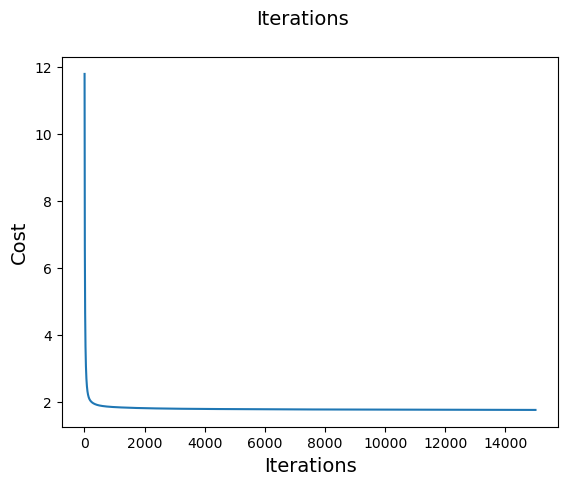

In [34]:
print("Execution time with Relu Activation function is",execution_time_relu)

# Learning curve or Loss vs iterations curve 

fig = plt.figure()
plt.plot(range(len(cost_list)), cost_list)
fig.suptitle('Iterations', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)

In [35]:
# Making predictions

z1 = np.dot(W_1, X) + B_1
a1 = relu(z1)
z2 = np.dot(W_2, a1) + B_2
a2 = softmax(z2) 
prediction_relu = np.argmax(a2, axis=0)

In [36]:
# Confusion Matrix and Classification Report for model with Sigmoid as Activation function

accuracy = accuracy_score(labels, prediction_relu)
print('Accuracy:',accuracy*100)

cm1 = confusion_matrix(labels, prediction_relu)
print(cm1)
classification_report(labels, prediction_relu)
print(classification_report(labels, prediction_relu))

Accuracy: 54.622506193767116
[[ 911  320  233  403]
 [ 449  579  537  214]
 [ 208  293 1147  248]
 [ 403  104   68 1552]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      1867
           1       0.45      0.33      0.38      1779
           2       0.58      0.60      0.59      1896
           3       0.64      0.73      0.68      2127

    accuracy                           0.55      7669
   macro avg       0.53      0.54      0.53      7669
weighted avg       0.54      0.55      0.54      7669



In [37]:
# Making predictions of labels on test.csv Actiation function Sigmoid 

z1 = np.dot(W_1, X_test_data.T) + B_1
a1 = relu(z1)
z2 = np.dot(W_2, a1) + B_2
a2 = softmax(z2) 
prediction2 = np.argmax(a2, axis=0)


In [38]:
# Printing prediction on the X_test_data

print(prediction2)

# Define a mapping dictionary
class_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Convert numerical predictions to classes
pred_classes = [class_mapping[pred] for pred in prediction2]

print(pred_classes[0:10])

[0 2 2 ... 0 1 3]
['A', 'C', 'C', 'D', 'A', 'B', 'C', 'C', 'D', 'D']


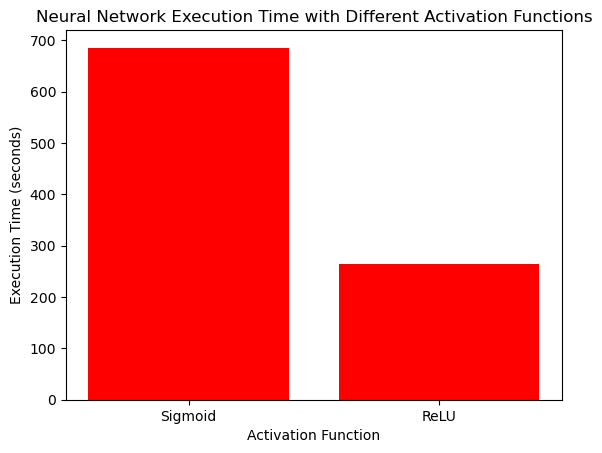

In [39]:
# Plot execution time for each activation function
plt.bar(['Sigmoid', 'ReLU'], [execution_time_sigmoid, execution_time_relu],color='red')
plt.xlabel('Activation Function')
plt.ylabel('Execution Time (seconds)')
plt.title('Neural Network Execution Time with Different Activation Functions')
plt.show() 

# 3. Neural Network using Scikit-learn:
• Use MLPClassifier class of the scikit-learn library to implement a neural network model
with 2 layers.
• Train the model on the preprocessed dataset.
• Repeat with three layers.
• Investigate how the accuracy of the two-layer neural network model varies with the
number of neurons in each hidden layer.
• Plot a graph with the number of neurons on the X-axis and the corresponding accuracy
on the Y-axis.
• Provide a brief analysis of how the number of neurons in the hidden layers affects the
model's performance. Consider discussing any trends, optimal neuron counts, and
possible reasons for the observed performance changes

In [40]:
# Printing shapes of features (X) and target variable (y)

print(features.shape, labels.shape)

# Accuracies 

accuracies = []

# Splitting features to traning and testing data

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25)


(7669, 9) (7669,)


In [41]:
# Normalizing the data

sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
# Multilayer classifier Model 1 (Two layer)
 
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(16,8),
                        max_iter = 2000,activation = 'relu', solver = 'adam')


In [43]:
mlp_clf1.fit(X_train_scaled, y_train)

y_pred = mlp_clf1.predict(X_test_scaled)

mlp_clf1_accuracy = accuracy_score(y_test, y_pred)

accuracies.append(mlp_clf1_accuracy)

print('Accuracy:',mlp_clf1_accuracy*100)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 51.668404588112615
[[206 106  52 106]
 [124 137 111  53]
 [ 60  92 261  57]
 [113  29  24 387]]
              precision    recall  f1-score   support

           0       0.41      0.44      0.42       470
           1       0.38      0.32      0.35       425
           2       0.58      0.56      0.57       470
           3       0.64      0.70      0.67       553

    accuracy                           0.52      1918
   macro avg       0.50      0.50      0.50      1918
weighted avg       0.51      0.52      0.51      1918



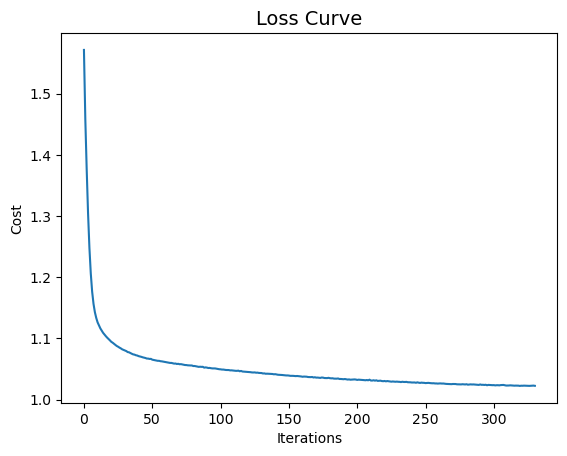

In [44]:
# Loss vs iterations plot

plt.plot(mlp_clf1.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [45]:
# Multilayer classifier Model 2 (Two layer)

mlp_clf2 = MLPClassifier(hidden_layer_sizes=(32,16),
                        max_iter = 2000,activation = 'relu', solver = 'adam')

In [46]:
mlp_clf2.fit(X_train_scaled, y_train)

y_pred = mlp_clf2.predict(X_test_scaled)

mlp_clf2_accuracy = accuracy_score(y_test, y_pred)

accuracies.append(mlp_clf2_accuracy)

print('Accuracy:',mlp_clf2_accuracy*100)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 49.582898852971844
[[203 104  68  95]
 [121 137 115  52]
 [ 56 102 263  49]
 [128  34  43 348]]
              precision    recall  f1-score   support

           0       0.40      0.43      0.42       470
           1       0.36      0.32      0.34       425
           2       0.54      0.56      0.55       470
           3       0.64      0.63      0.63       553

    accuracy                           0.50      1918
   macro avg       0.49      0.49      0.48      1918
weighted avg       0.49      0.50      0.49      1918



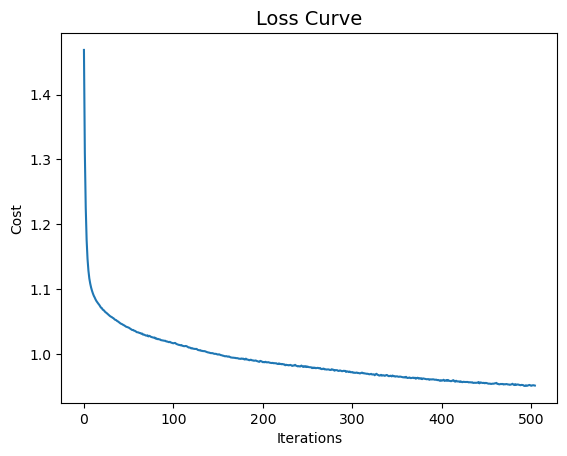

In [47]:
# Loss vs iterations plot

plt.plot(mlp_clf2.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [48]:
# Multilayer classifier Model 3 (Two layer)

mlp_clf3 = MLPClassifier(hidden_layer_sizes=(128,64),
                        max_iter = 2000,activation = 'relu', solver = 'adam')

In [49]:
mlp_clf3.fit(X_train_scaled, y_train)

y_pred = mlp_clf3.predict(X_test_scaled)

mlp_clf3_accuracy = accuracy_score(y_test, y_pred)

accuracies.append(mlp_clf3_accuracy)

print('Accuracy:',mlp_clf3_accuracy*100)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 48.018769551616266
[[171 133  79  87]
 [ 96 152 127  50]
 [ 42 102 274  52]
 [109  65  55 324]]
              precision    recall  f1-score   support

           0       0.41      0.36      0.39       470
           1       0.34      0.36      0.35       425
           2       0.51      0.58      0.55       470
           3       0.63      0.59      0.61       553

    accuracy                           0.48      1918
   macro avg       0.47      0.47      0.47      1918
weighted avg       0.48      0.48      0.48      1918



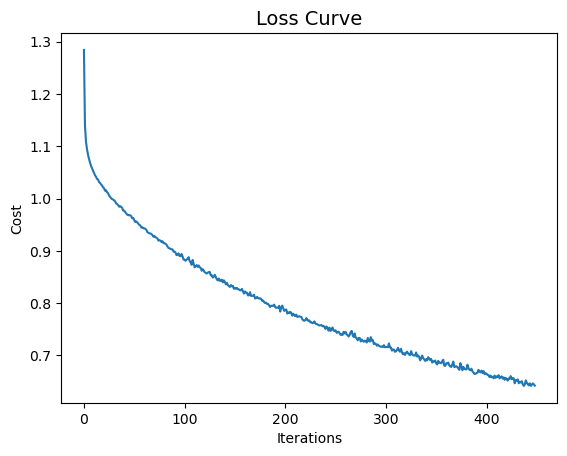

In [50]:
# Loss vs iterations plot

plt.plot(mlp_clf3.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

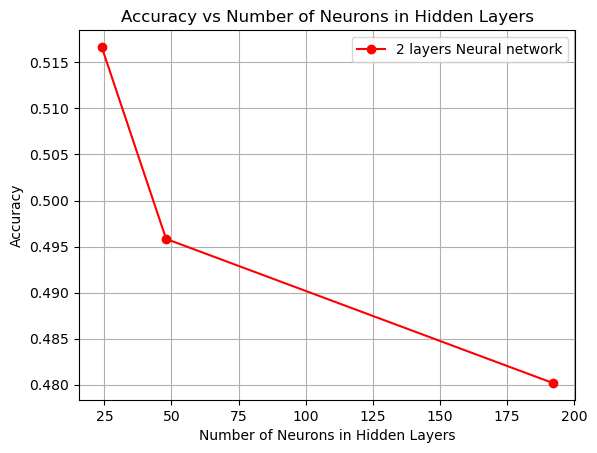

In [51]:
# Plot the graph
#plt.plot(neurons_range, accuracies, label='2 Layers')

neurons_range = [(16+8),(32+16),(128+64)]

plt.plot(neurons_range, accuracies, label='2 layers Neural network', marker ='o', color ='red')
plt.xlabel('Number of Neurons in Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neurons in Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Multilayer classifier Model 1 (Three layer)
 
mlp_clf1_3layer = MLPClassifier(hidden_layer_sizes=(32,16,8),
                        max_iter = 2000,activation = 'relu', solver = 'adam')

In [53]:
mlp_clf1_3layer.fit(X_train_scaled, y_train)

y_pred = mlp_clf1_3layer.predict(X_test_scaled)

mlp_clf = accuracy_score(y_test, y_pred)



print('Accuracy:',mlp_clf*100)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 50.46923879040668
[[199 105  70  96]
 [120 130 125  50]
 [ 52  93 274  51]
 [106  52  30 365]]
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       470
           1       0.34      0.31      0.32       425
           2       0.55      0.58      0.57       470
           3       0.65      0.66      0.65       553

    accuracy                           0.50      1918
   macro avg       0.49      0.49      0.49      1918
weighted avg       0.50      0.50      0.50      1918



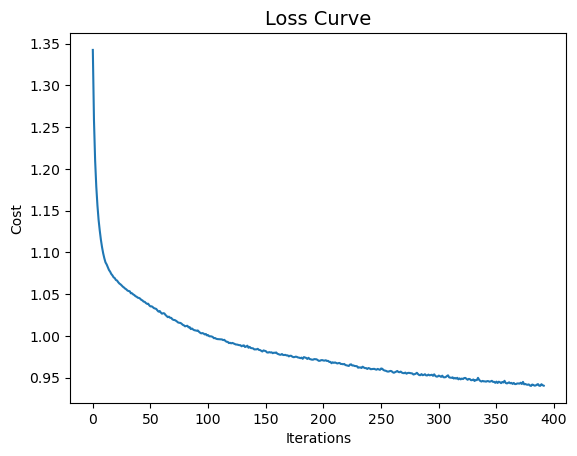

In [54]:
# Loss vs iterations plot

plt.plot(mlp_clf1_3layer.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# 4. Logistic Regression Implementation:
• Implement a logistic regression model using scikit-learn as a baseline for comparison.
• Train the model on the same preprocessed dataset

In [58]:
from sklearn.linear_model import LogisticRegression

# Using preprocessed features and labels to split the data to test and train sets

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)


# Make predictions
y_pred = logistic_regression.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy of Logistic Regression: 49.67405475880052
[[254  66 118 126]
 [179  68 228  80]
 [ 94  51 345  80]
 [ 80  25  31 476]]
              precision    recall  f1-score   support

           0       0.42      0.45      0.43       564
           1       0.32      0.12      0.18       555
           2       0.48      0.61      0.53       570
           3       0.62      0.78      0.69       612

    accuracy                           0.50      2301
   macro avg       0.46      0.49      0.46      2301
weighted avg       0.47      0.50      0.47      2301



In [56]:
# Make predictions on the test.csv

y_pred1 = logistic_regression.predict(X_test_data)

# Printing predicitions on the test.csv

print(y_pred1)

[0 1 3 ... 0 1 3]


# 5. Evaluation and Comparison:
• Display the learning curve for each model to understand the training process.
• Evaluate the performance of each model using a confusion matrix and classification 
report.
• Compare the performance of the neural network models with logistic regression, 
discussing the strengths and weaknesses of each approach.


Accuracy, confusion matrix and classification report for Neural network model implemented with sigmoid as activation function is below 

Execution time with Sigmoid Activation function is 685.5415522098541

Accuracy: 54.23132090233407
[[ 895  363  218  391]
 [ 437  581  539  222]
 [ 202  321 1123  250]
 [ 401  114   52 1560]]
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1867
           1       0.42      0.33      0.37      1779
           2       0.58      0.59      0.59      1896
           3       0.64      0.73      0.69      2127

    accuracy                           0.54      7669
   macro avg       0.53      0.53      0.53      7669
weighted avg       0.53      0.54      0.54      7669



Accuracy, confusion matrix and classification report for Neural network model implemented with Relu as activation function is below 

Execution time with Relu Activation function is 265.8711338043213

Accuracy: 54.626032077193894
[[ 886  337  266  378]
 [ 437  608  532  202]
 [ 221  311 1126  238]
 [ 402  110   58 1557]]
              precision    recall  f1-score   support

           0       0.46      0.47      0.46      1867
           1       0.45      0.34      0.39      1779
           2       0.57      0.59      0.58      1896
           3       0.66      0.73      0.69      2127

    accuracy                           0.54      7669
   macro avg       0.53      0.54      0.53      7669
weighted avg       0.54      0.54      0.54      7669


We can observe that the accuracy of both the models which different activation functions are almost but we see that the execution time taken for the Sigmoid is very high as compared to the Relu for the same number of epochs(iterations).

From these observation we can conclude that Relu activation function convergers faster than the Sigmoid


Accuracy, confusion matrix and classification report for Two Neural network model implemented with (16,8) neurons in first and second layer

Model 1

Accuracy: 53.4932221063608
[[213  86  49 103]
 [124 125 143  56]
 [ 62  71 295  65]
 [ 99  19  15 393]]
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       451
           1       0.42      0.28      0.33       448
           2       0.59      0.60      0.59       493
           3       0.64      0.75      0.69       526

    accuracy                           0.53      1918
   macro avg       0.52      0.52      0.52      1918
weighted avg       0.52      0.53      0.52      1918

Accuracy, confusion matrix and classification report for Two Neural network model implemented with (32,16) neurons in first and second layer

Model 2

Accuracy: 52.24191866527633
[[181 105  62 103]
 [114 126 160  48]
 [ 49  80 304  60]
 [ 86  27  22 391]]
              precision    recall  f1-score   support

           0       0.42      0.40      0.41       451
           1       0.37      0.28      0.32       448
           2       0.55      0.62      0.58       493
           3       0.65      0.74      0.69       526

    accuracy                           0.52      1918
   macro avg       0.50      0.51      0.50      1918
weighted avg       0.51      0.52      0.51      1918


Accuracy, confusion matrix and classification report for Two Neural network model implemented with (128,64) neurons in first and second layer

Model 3

Accuracy: 48.6444212721585
[[183 106  77  85]
 [104 123 170  51]
 [ 70  81 285  57]
 [ 87  45  52 342]]
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       451
           1       0.35      0.27      0.31       448
           2       0.49      0.58      0.53       493
           3       0.64      0.65      0.64       526

    accuracy                           0.49      1918
   macro avg       0.47      0.48      0.47      1918
weighted avg       0.48      0.49      0.48      1918

From the loss curves of these model which are above we can see that model convereged within 250 epochs and aslo the accuracy of the model is also good compared to other two models with different number of neurons

For the model 3 loss vs iterations curve we can see that the loss has reached minimal compared to model 1 and 2 but the accuracy of the model3 is dropped compared to other models which means the model is overfitted and didn't performed well on the test data.

So we can conclude that as we increase the number of neurons the model started getting overfitted as the complexicity of model is increased but with the limited training data and also the accuracy is dropped. 

Accuracy, confusion matrix and classification report for Two Neural network model implemented with (32,16,8) neurons in first,second and third layer consecutively 

Accuracy: 52.24191866527633
[[207  99  54  91]
 [106 138 151  53]
 [ 71  84 283  55]
 [ 92  32  28 374]]
              precision    recall  f1-score   support

           0       0.43      0.46      0.45       451
           1       0.39      0.31      0.34       448
           2       0.55      0.57      0.56       493
           3       0.65      0.71      0.68       526

    accuracy                           0.52      1918
   macro avg       0.51      0.51      0.51      1918
weighted avg       0.51      0.52      0.52      1918

Accuracy, confusion matrix and classification report for Logistic regression model implemented using the scikit learn library

Accuracy of Logistic Regression: 49.67405475880052
[[254  66 118 126]
 [179  68 228  80]
 [ 94  51 345  80]
 [ 80  25  31 476]]
              precision    recall  f1-score   support

           0       0.42      0.45      0.43       564
           1       0.32      0.12      0.18       555
           2       0.48      0.61      0.53       570
           3       0.62      0.78      0.69       612

    accuracy                           0.50      2301
   macro avg       0.46      0.49      0.46      2301
weighted avg       0.47      0.50      0.47      2301

Comparision of performance of Neural network with logistic regression model on the above data

We can see that the accuracy obtained with both the approaches is almost nearly same but the Neural network perfomed well with highest accuracy but the execution time is comparitively high compared to the logistic regression model.

The logistic regression model performs very good on the small datasets and would much faster compared to the Neural network, if the architecture of the neural network is complex it makes the model to get overfitted, so neural networks are prone to overfitting problem when the dataset is small or the training data size is limited.

So it depends on the nature of dataset to choose the perfect model which perform well on the data.



Comparing the performance of neural network models with logistic regression involves considering various factors such as accuracy, computational complexity, interpretability, and suitability for the given task. 

Neural Network Models:
Pros:
Non-linearity:Neural networks are well-suited for jobs with sophisticated patterns because they are able to learn complex non-linear correlations between features and goal variables.
Flexibility: Neural networks can handle large amounts of data and are capable of capturing intricate patterns, making them suitable for a wide range of tasks including image recognition, natural language processing, and time-series forecasting.

Cons:
Complexity: Neural networks are complex models with many parameters, making them computationally expensive to train, especially for large datasets.
Overfitting: Prone to overfitting, especially with complex architectures and limited data.


Logistic Regression:

Efficiency: Computationally efficient and quick to train, even on large datasets.
Linear Boundaries: Limited to capturing linear relationships between features and target.
Limited Expressiveness: May not capture intricate relationships as effectively as neural networks.
Data Requirement: Can perform well with smaller datasets.
Accuracy: May have lower accuracy compared to neural networks for complex tasks.


In conclusion, neural networks are very flexible and accurate, but they also require a lot of processing power and are harder to understand. Contrarily, logistic regression is effective, comprehensible, and appropriate for smaller datasets; nevertheless, it might not be as good at capturing intricate correlations. The decision between them is based on the resources that are available, the complexity of the activity, and the necessity for interpretability.
